# 假设检验基础

In [1]:
# import image module
from IPython.display import Image

# get the image
Image(url="WechatIMG30.jpeg", width=300, height=300)

In [2]:
# get the image
Image(url="WechatIMG31.jpeg", width=300, height=300)

H0:零假设、原假设或 Null Hypothesis
H1:对立假设、备择假设或 Alternative Hypothesis


现实中,由于统计工作的滞后性,我们经常遇到用一个样本和已知的一个总体作比较的情形。我们先假设这个样本来自这个已知总体,然后根据此样本均值在已知总体的抽构样分布中是否处于极端区域,来判断是否拒绝这个假设。


In [3]:
# get the image
Image(url="WechatIMG32.jpeg", width=300, height=300)

# T分布，t值假设检验

In [67]:
# generate two arrays with ND
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# noraml(mean, var, size)
S1 = np.random.normal(30, 3, 1500).astype(int)
S2 = np.random.normal(10, 2, 1500).astype(int)

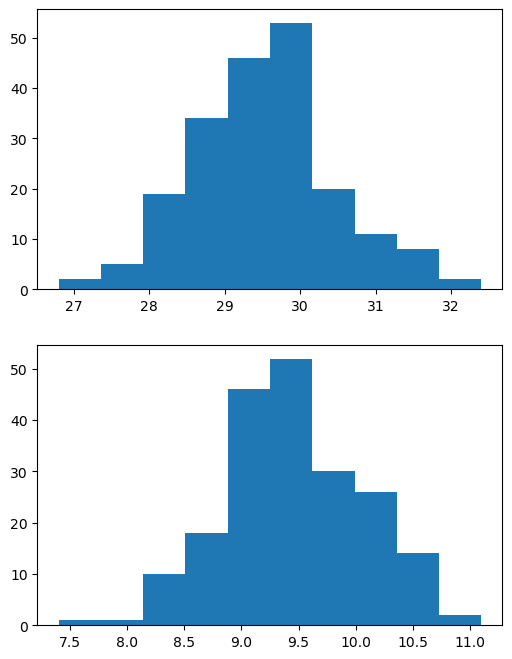

In [68]:
# 均值抽样
def sample_testing(data):
    sample_size = 10  # 样本大小为10
    test_round = 200  # 抽样次数
    df = pd.DataFrame(columns=['sample_mean'])
    for round in range(test_round):
        sample = np.random.choice(data, sample_size)
        sample_mean = sample.mean()
        df.loc[len(df)] = sample_mean
    return df

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(sample_testing(S1))
ax2.hist(sample_testing(S2))
plt.show()

## 1. 处理对称轴和跨度
- （样本数据 - 样本均值）/ 样本标准差
- 转变为标准正态分布 -> N(0,1)

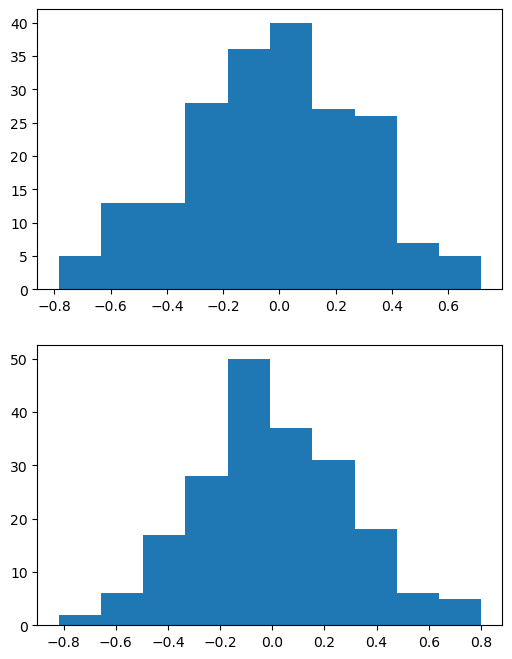

In [69]:
# 偏离值， 保证数值偏离总体均值落在0左右
S1 = (S1 - S1.mean())/(np.std(S1))
S2 = (S2 - S2.mean())/(np.std(S2))

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(sample_testing(S1))
ax2.hist(sample_testing(S2))
plt.show()

In [53]:
# 标准差
Image(url="WechatIMG33.png", width=300, height=300)

# 统计量t
- t = （抽样样本均值 - 整体样本均值）/（样本标准差 / sqrt(抽样样本数量)）
- t值对应的就是横坐标的值
- 在t值之后的曲线下面积就是P值 （p-value）

In [54]:
# t值
Image(url="WechatIMG34.png", width=300, height=300)

### t值抽样检测
- 原理相似，确定样本容量，抽样次数

In [80]:
# t值抽样检测
def t_val_sample_testing(data):
    sample_size = 20  # 样本大小为20
    test_round = 1000  # 抽一千次
    df = pd.DataFrame(columns=['sample_t_val'])
    for round in range(test_round):
        sample = np.random.choice(data, sample_size)
        sample_t_val = (sample.mean() - data.mean()) / (np.std(sample) / np.sqrt(sample_size))
        df.loc[len(df)] = sample_t_val
    return df

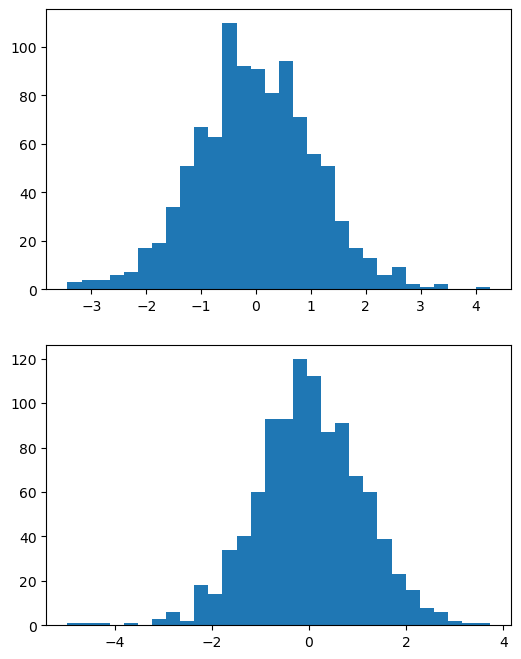

In [92]:
S_test1 = np.random.normal(30, 3, 1500).astype(int)
S_test2 = np.random.normal(10, 2, 1500).astype(int)

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(t_val_sample_testing(S_test1),bins=30)
ax2.hist(t_val_sample_testing(S_test2),bins=30)
plt.show()

In [55]:
Image(url="WechatIMG35.jpeg", width=300, height=300)

## t检验自由度